<a href="https://colab.research.google.com/github/PMabwa/airbnb-recommender-system/blob/kelvin2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Recommender System

![Cape Town image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/top-air-bnb-cape-town-south-africa.jpg?raw=1)

## Summary

This project aims to develop a data-driven model to analyze patterns in Airbnb listings and generate insights to optimize pricing, occupancy rates, and customer satisfaction for hosts in Cape Town. Using data from [Inside Airbnb](https://insideairbnb.com/get-the-data/), the model will be trained on various features such as property type, location, amenities, reviews, price, and host activity.

This system can benefit hosts, property managers, and tourism platforms by providing actionable insights into market trends and property performance. It will involve several stages, including data cleaning, exploratory data analysis (EDA), feature engineering, model selection, and evaluation.

Throughout the project, we will explore relationships between property features and key performance indicators, such as pricing and occupancy rates, to identify factors driving success. Advanced modeling techniques, such as regression analysis and machine learning models, will help predict optimal listing prices and understand the dynamics of customer behavior.

By developing a robust predictive model, this project can offer practical applications for the short-term rental market in Cape Town. Hosts and property managers can leverage these insights to improve competitiveness, enhance guest satisfaction, and optimize revenue management strategies.

## Introduction

This project aims to build a data-driven model for analyzing Airbnb listings in Cape Town to provide actionable insights for optimizing pricing, occupancy rates, customer satisfaction, and recommending the best Airbnbs to users. By leveraging data from Inside Airbnb, the project will involve comprehensive data analysis, preprocessing, feature engineering, and predictive modeling to understand the factors influencing property performance. Additionally, a recommendation system will be developed to guide users in finding top-rated and suitable Airbnb options. The results will help hosts and property managers make informed decisions to enhance their competitiveness and revenue strategies in the short-term rental market.

## Business Understanding

The short-term rental industry is highly competitive, with Airbnb hosts and property managers striving to optimize occupancy rates, maximize revenue, and enhance guest satisfaction. Cape Town's vibrant tourism sector amplifies the need for hosts to remain competitive by offering well-priced, attractive listings that deliver positive guest experiences.

A major challenge for hosts is determining optimal prices and maintaining high occupancy rates while consistently providing quality services. Managing the many factors that contribute to a listing's success—such as location, property type, amenities, and guest reviews—can be complex and time-consuming, especially in a rapidly changing market.


### Business Problem

Hosts and property managers face difficulties in pricing their properties effectively, understanding the elements that drive higher occupancy, and delivering consistent guest satisfaction, all of which are crucial for maintaining a competitive edge in the market.


**Objective:**

> ***Develop a data-driven model that analyzes Airbnb listings in Cape Town to predict optimal prices.***

> ***Identify factors contributing to higher occupancy rates and guest satisfaction.***

> ***Provide recommendations for the best Airbnb options for users.***

## Data Understanding

The data used in this project can be found [here](https://insideairbnb.com/get-the-data/). It is sourced from [`insideairbnb.com`](https://insideairbnb.com) and contains detailed information about Airbnb listings in Cape Town. The dataset provides insights into various aspects of each listing, including property details, host information, pricing, reviews, and availability.

Given the dataset contains ***87*** columns, listing them all here would be impractical. For a full description of the features and their meanings, please refer to the comprehensive feature list available in this [Google Doc](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596).

The key data files are as follows:

1. `listings.csv` – Contains detailed information about each property listing. Each record represents one listing and includes features such as property type, price, location, and review scores.
2. `calendar.csv` – Provides availability and pricing data for each listing across multiple dates.
3. `reviews.csv` – Contains individual reviews left by guests, along with the date of the review and guest details.

Each listing is uniquely identified across files, allowing for merging and analysis across datasets. This rich, multi-dimensional data will enable us to extract valuable insights into factors influencing pricing, occupancy, and guest satisfaction.

## Data Preparation and Cleaning

In this section, we are going to do the following:

1. Import the necessary libraries.
2. Preview data and ensure they are of correct datatypes.
3. Load our datasets and merge them to have a final unified dataset.
4. Check for missing values & handle them.
5. Check for duplicates & handle them.
6. Feature engineering.

In [2]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [78]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=4ee390eea77197dbe48a7baead6924190645c9ffa755457d749d888299a790e8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import joblib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from surprise import Reader, Dataset, KNNBasic, KNNWithMeans, KNNBaseline, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
import random

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# load the datasets
# load listings
listings_df = pd.read_csv('/content/listings.csv.gz', compression='gzip')
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47


In [5]:
listings_df.dropna(subset=['reviews_per_month'], inplace=True)

In [6]:
# load reviews
reviews_df = pd.read_csv('/content/reviews.csv.gz', compression='gzip')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [7]:
reviews_df.isna().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,1
comments,117


In [8]:
reviews_df.dropna(inplace=True)

In [9]:
# Merging dataframes
# Merge listings_df with reviews_df using 'id' from listings_df and 'listing_id' from reviews_df
capetown_airbnb_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
capetown_airbnb_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [10]:
# check for duplicates
capetown_airbnb_df.duplicated().sum()

0

Next, we check for duplicates. There were none.

In [11]:
# Feature Engineering
# average of the ratings columns to 1 column 'avg_rating'

# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
capetown_airbnb_df['avg_rating'] = capetown_airbnb_df[rating_columns].mean(axis=1)

In [12]:
# Verify the new column
print(capetown_airbnb_df[['avg_rating']].tail(100))

        avg_rating
560220    4.928571
560221    4.928571
560222    5.000000
560223    5.000000
560224    5.000000
...            ...
560315    5.000000
560316    5.000000
560317    5.000000
560318    5.000000
560319    5.000000

[100 rows x 1 columns]


In [13]:
# print columns in modified `capetown_airbnb_df`
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [14]:
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['scrape_id', 'last_scraped', 'source', 'host_url', 'host_name', 'host_since', 'host_since',
                   'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                   'host_has_profile_pic', 'neighbourhood_group_cleansed',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'listing_id', 'id_y', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

capetown_airbnb_df = capetown_airbnb_df.drop(columns=columns_to_drop)

In [15]:
# check remaining columns
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'picture_url', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'number_of_reviews', 'instant_bookable',
       'date', 'reviewer_id', 'comments', 'avg_rating'],
      dtype='object')

In [16]:
capetown_airbnb_df.isna().sum()

,0
id_x,0
listing_url,0
name,0
description,4385
neighborhood_overview,101305
picture_url,0
host_id,0
host_response_time,62884
host_response_rate,62884
host_is_superhost,28396


Remove null values.

In [17]:
capetown_airbnb_df.dropna(inplace=True)

In [18]:
capetown_airbnb_df.isna().sum().sum()

0

## EDA

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis

#### Date

In [19]:
# Remove currency symbols and commas from the 'price' column, then convert to float
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'date' to datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

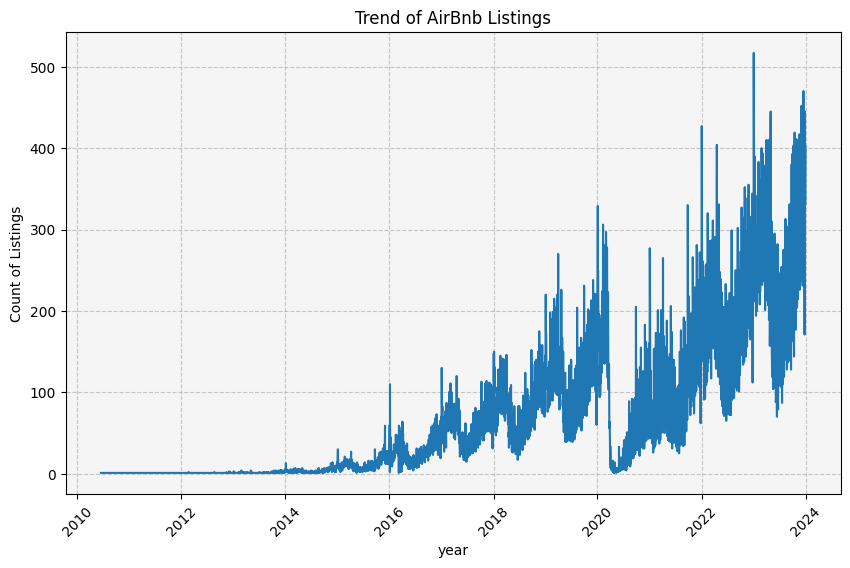

In [20]:
# Count occurrences of each date and sort by index
date_counts = capetown_airbnb_df['date'].value_counts().sort_index()

# Filter out dates in 2024
date_counts = date_counts[date_counts.index.year < 2024]

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=date_counts.index, y=date_counts.values)

# Customize the plot background
plt.gca().set_facecolor('#f5f5f5')  # Light grey background
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('year')
plt.ylabel('Count of Listings')
plt.title('Trend of AirBnb Listings')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

This line plot shows that AirBnb listings has increased over the years.

#### Host Response Time

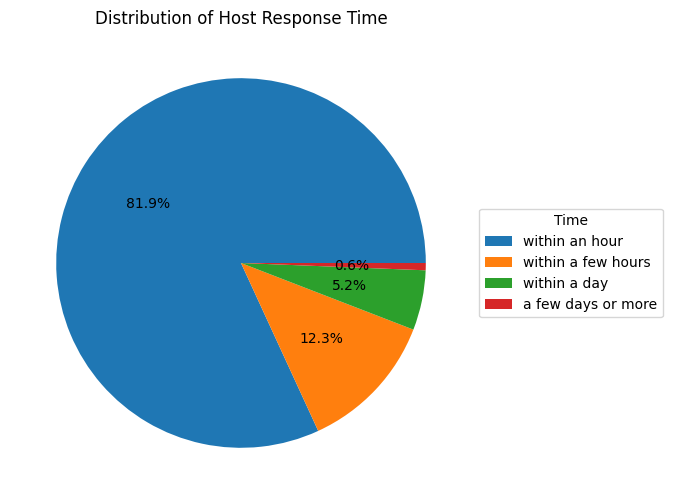

In [21]:
plt.figure(figsize=(10,6))
plt.pie(capetown_airbnb_df.host_response_time.value_counts(), autopct='%1.1f%%')
plt.title('Distribution of Host Response Time')
plt.legend(labels = capetown_airbnb_df.host_response_time.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that most hosts respond quickly, with the vast majority (82%) responding within an hour, which could be a key selling point for Airbnb customers looking for prompt communication.

#### Superhost Distribution

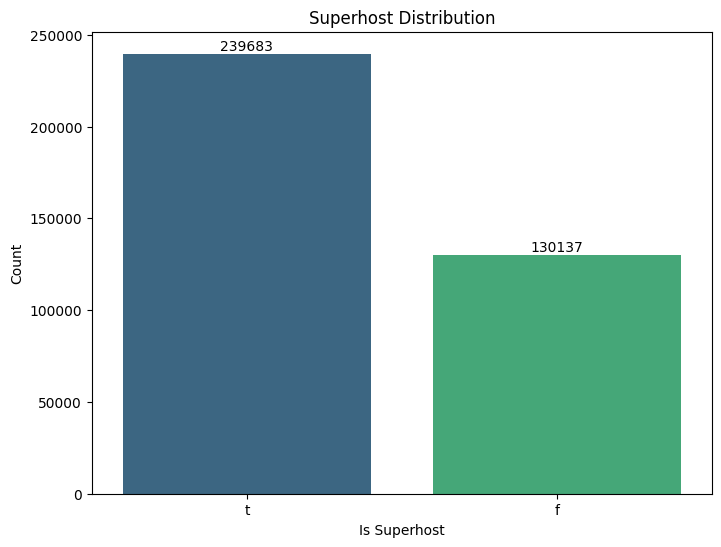

In [22]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.host_is_superhost.value_counts().index
y = capetown_airbnb_df.host_is_superhost.value_counts().values

sns.barplot(x=x, y=y, palette='viridis')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Superhost Distribution')
plt.ylabel('Count')
plt.xlabel('Is Superhost')

# Display the plot
plt.show()

The bar chart above shows that most of the host are Superhosts (239683).

#### Host ID Verification

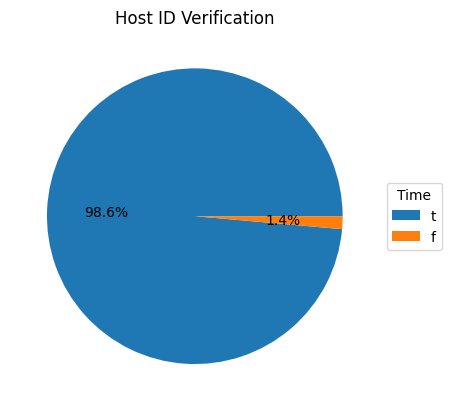

In [23]:
plt.pie(capetown_airbnb_df.host_identity_verified.value_counts(), autopct='%1.1f%%')
plt.title('Host ID Verification')
plt.legend(labels = capetown_airbnb_df.host_identity_verified.value_counts().index, title="Time", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart above shows that 98.6% of AirBnb hosts are verified hence can be trusted.

#### Neighbourhood

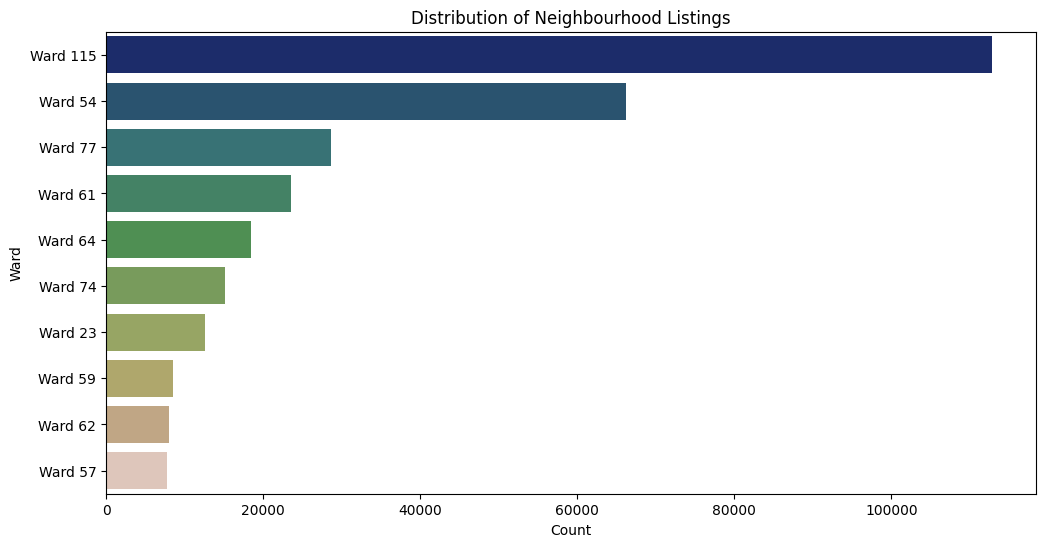

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.neighbourhood_cleansed.value_counts().values[:10], y=capetown_airbnb_df.neighbourhood_cleansed.value_counts().index[:10], palette="gist_earth")
plt.title('Distribution of Neighbourhood Listings')
plt.ylabel('Ward')
plt.xlabel('Count')
plt.show()

The bar chart above shows that Ward 115 (138191 listings), Ward 54 (78705 listings) and Ward 77 (32032 listings) have the most listings.

#### Area Visualization Heatmap

In [ ]:
# use MarkerCluster
from folium.plugins import MarkerCluster

# Create map
map_center = [-33.9249, 18.4241]
m = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add points to the cluster layer
for idx, row in capetown_airbnb_df.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(marker_cluster)

# Display map
m

In [ ]:
from folium.plugins import HeatMap

# Create list of points
points = capetown_airbnb_df[['latitude', 'longitude']].values.tolist()

# Add heatmap layer
HeatMap(points).add_to(m)

In [ ]:
# Save the map
m.save('my_heatmap.html')

![Heatmap image](https://github.com/PMabwa/airbnb-recommender-system/blob/kelvin2/images/heatmap.png?raw=1)

- The heatmap above shows that the highest concentration (297594 listings) appears to be in the central Cape Town area.

- Airbnbs are heavily concentrated in the tourist-friendly coastal areas and city center, with significantly less activity in the inland regions.

#### Property Type

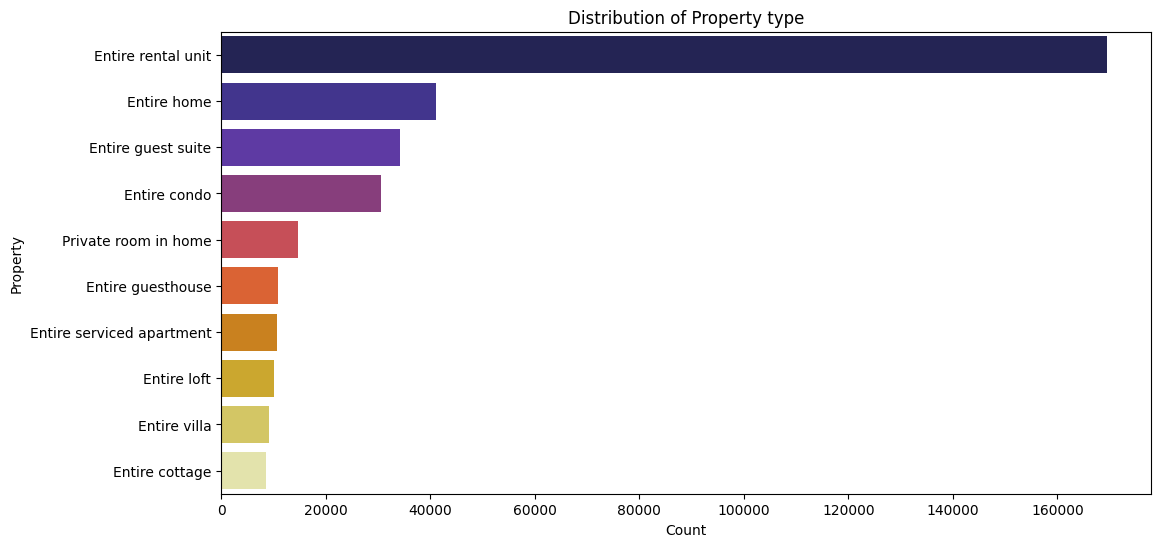

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=capetown_airbnb_df.property_type.value_counts().values[:10], y=capetown_airbnb_df.property_type.value_counts().index[:10], palette="CMRmap")
plt.title('Distribution of Property type')
plt.ylabel('Property')
plt.xlabel('Count')
plt.show()

The bar chart above shows that the majority of Airbnb listings in Cape Town are entire rental units (213788), followed by entire homes (48651), while other property types like guest suites, condos, and private rooms have significantly lower representation.


#### Trend in price

Next, we'll create a line chart to show trends over time. We'll group the data by month. first, let's extract the month from the date column.

In [26]:
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace('[$,]', '', regex=True).astype(float).astype(int)

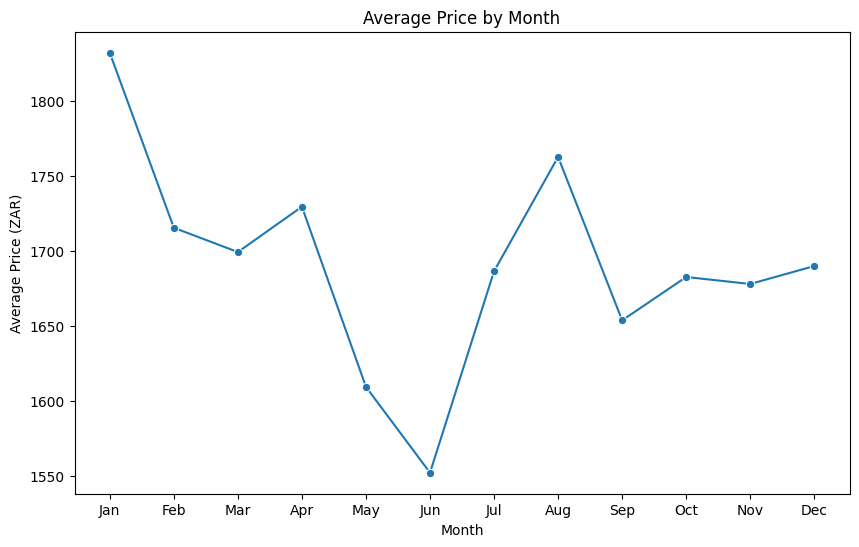

In [27]:
# month
capetown_airbnb_df['month'] = capetown_airbnb_df['date'].dt.month

# Calculate average price per month
avg_price_per_month = capetown_airbnb_df.groupby('month')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='price', data=avg_price_per_month, marker='o')

# labels and title
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (ZAR)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show();

The line chart above shows the average Airbnb prices in Cape Town month-by-month. Key trends:

1. January: Peaks around 1850 ZAR, likely due to high tourist season and summer holidays.

2. February to March: Prices drop significantly as the holiday season ends and demand decreases.

3. April to May: Fluctuation continues, leading to a low in June (~1500 ZAR), coinciding with the cooler, off-peak travel season.

4. July to August: Sharp rise, peaking in August, possibly due to winter events and regional holidays.

5. September to October: Prices dip again, reflecting a lull before the spring and summer uptick.

6. November to December: Slight upward trend as summer returns and holiday bookings start to pick up again.

#### Average Price by Season

Now, we'll analyze seasonal variations in prices. First, we'll create a season column based on the listing dates, then use a bar plot to visualize the average price for each season. We'll categorize each month into a season (winter, spring, summer, fall).

In [28]:
# Ensuring date column is in datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# function to categorize seasons
def get_season(month):
    if month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    elif month in [12, 1, 2]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
capetown_airbnb_df['season'] = capetown_airbnb_df['date'].dt.month.apply(get_season)

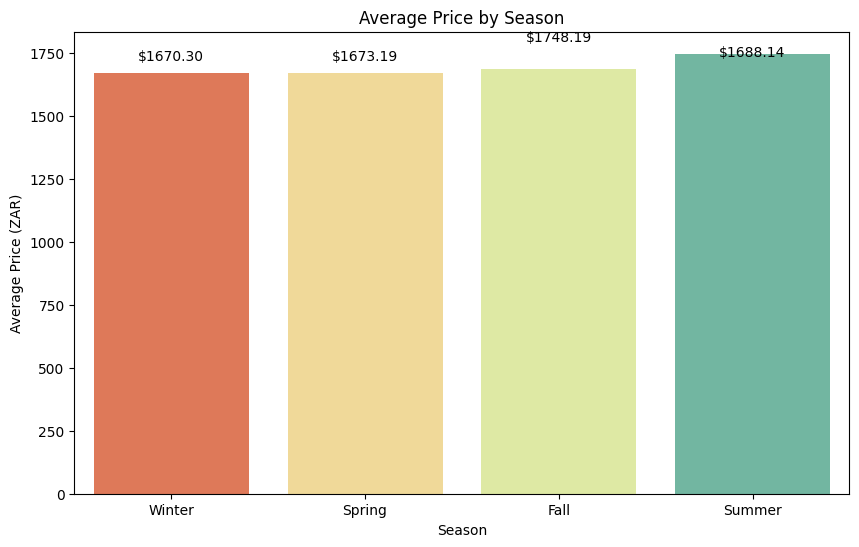

In [29]:
# Calculate average price per season
avg_price_per_season = capetown_airbnb_df.groupby('season')['price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index().sort_values(by='price')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='season', y='price', data=avg_price_per_season, palette='Spectral')

# Add labels on each bar
for index, row in avg_price_per_season.iterrows():
    barplot.text(x=index, y=row['price'] + 50, s=f"${row['price']:.2f}", ha='center', color='black')

# Add labels and title
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (ZAR)')

plt.show()

The bar chart above shows the average Airbnb prices in Cape Town by season.

Key insights:

1. Summer: Highest average price, around 1748 ZAR, indicating peak tourist season and high demand.

2. Fall: Average price of 1688 ZAR, suggesting continued strong interest.

3. Spring: Close to Fall with an average of 1673 ZAR, possibly due to milder weather and events.

4. Winter: Lowest average price, around 1670 ZAR, reflecting the off-peak season with fewer visitors.

The chart highlights that Summer is the most expensive time for Airbnb stays, likely driven by high tourist influx.

#### Distribution of Price

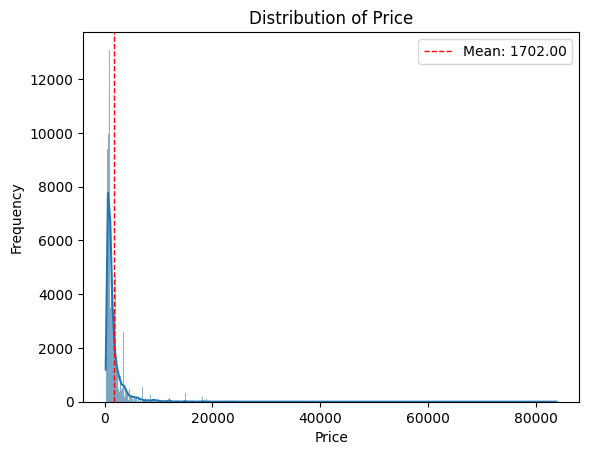

In [30]:
# mean of the 'price' column
mean_value = capetown_airbnb_df['price'].mean()

# histogram
sns.histplot(capetown_airbnb_df['price'], kde=True)

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')

# Add legend and labels
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.show();

The KDE of the histogram above shows that the average price of Airbnbs in CapeTown is 1702 ZAR.

#### Instant Bookable

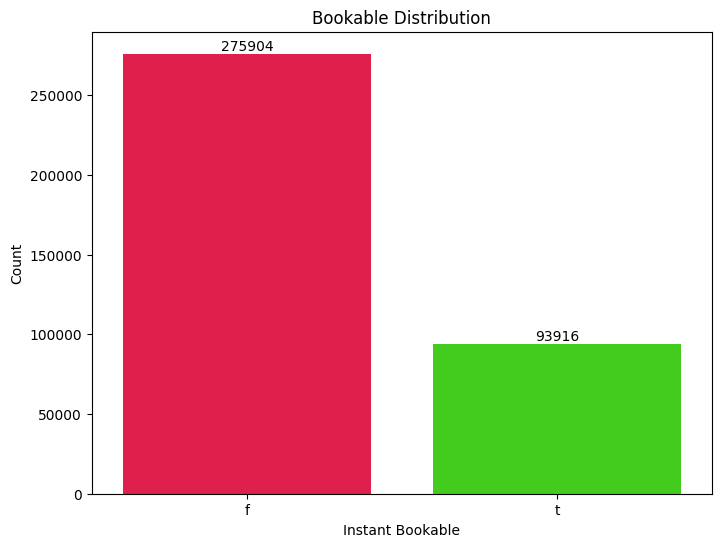

In [31]:
# Create the barplot
plt.figure(figsize=(8,6))

x = capetown_airbnb_df.instant_bookable.value_counts().index
y = capetown_airbnb_df.instant_bookable.value_counts().values

sns.barplot(x=x, y=y, palette='prism_r')

# Add values on top of the bars
for i in range(len(x)):
    plt.text(i, y[i] + 50, str(y[i]), ha='center', va='bottom')

# Add title and labels
plt.title('Bookable Distribution')
plt.ylabel('Count')
plt.xlabel('Instant Bookable')

# Display the plot
plt.show()

- Larger portion of listings (326,965) are not instantly bookable ("f"), while a smaller number (123,225) are available for instant booking ("t").

- Many hosts may choose not to offer instant booking to maintain control over their guest selection, allowing them to screen guests, manage booking dates more effectively, or communicate specific rules before confirming a reservation.


### Bivariate Analysis

#### Price v. Average Rating

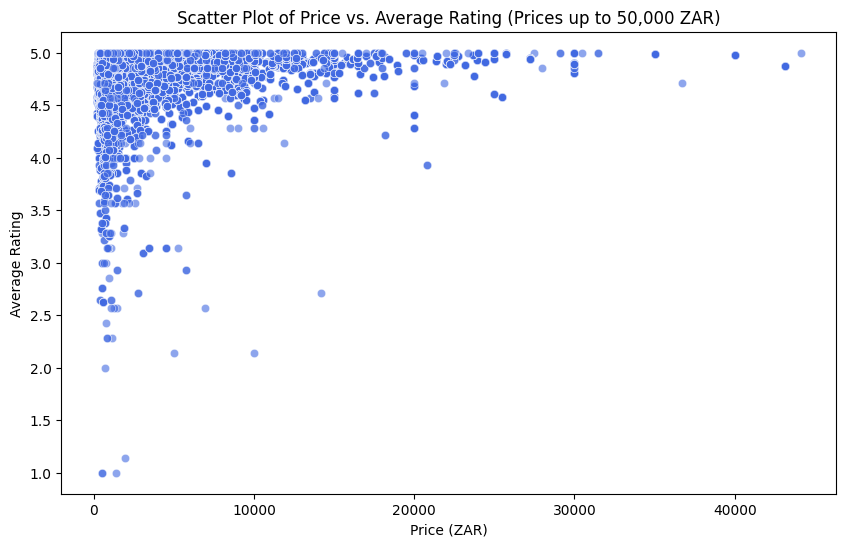

In [32]:
# Create a scatter plot to visualize the relationship between price and avg_rating
# Convert the 'price' column to numeric and remove $ sign
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filter df to include only listings with a price of up to ZAR 50,000
filtered_df = capetown_airbnb_df[capetown_airbnb_df['price'] <= 50000]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with a soft blue color and transparency for better visual appeal
sns.scatterplot(x='price', y='avg_rating', data=filtered_df, color='royalblue', alpha=0.6)

# labels, title
plt.title('Scatter Plot of Price vs. Average Rating (Prices up to 50,000 ZAR)')
plt.xlabel('Price (ZAR)')
plt.ylabel('Average Rating')
plt.show()

This scatter plot shows the relationship between the price (in ZAR) and the average rating of properties, with prices up to 50,000 ZAR.

Key observations:

- The majority of properties, regardless of price, have high average ratings, clustering around 4.0 to 5.0.
- Fewer properties have lower average ratings (below 3.0), spread across various price points.
- No clear trend indicates that higher prices correlate with higher average ratings or vice versa.
- There's a dense concentration of items with prices below 2,000 ZAR and ratings between 4.0 and 5.0.

This scatter plot shows that high ratings are common across a wide range of prices.

#### Price v. Property Type

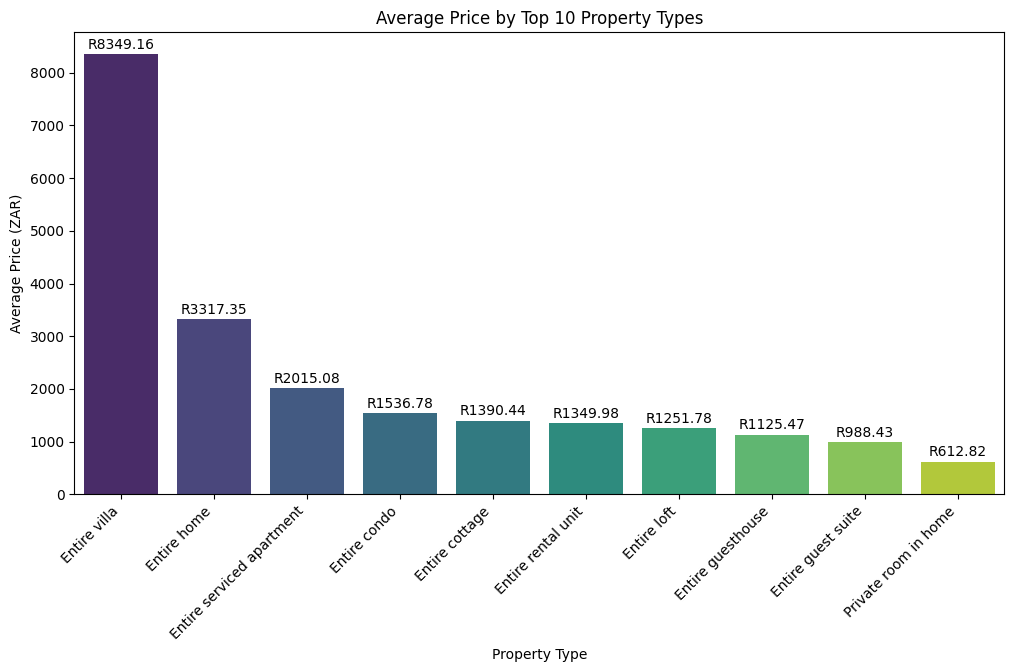

In [33]:
# Count the occurrences of each property type
property_counts = capetown_airbnb_df['property_type'].value_counts()

# Select the top 10 most common property types
top_property_types = property_counts.nlargest(10).index

# Calculate average price for top property types
avg_price_per_property_type = capetown_airbnb_df[capetown_airbnb_df['property_type'].isin(top_property_types)] \
    .groupby('property_type')['price'].mean().reset_index()

# Sort values for better visualization
avg_price_per_property_type = avg_price_per_property_type.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='property_type', y='price', data=avg_price_per_property_type, palette='viridis')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Add dollar sign and format price to 2 decimal places
for i, price in enumerate(avg_price_per_property_type['price']):
    barplot.text(i, price + 50, f"R{price:.2f}", ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Average Price by Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Price (ZAR)')
plt.show()

The bar chart above shows that booking an entire villa is the most expensive with (over $8000), followed by the entire home and Barn.

#### Average Ratings of Superhosts vs. Non-Superhosts

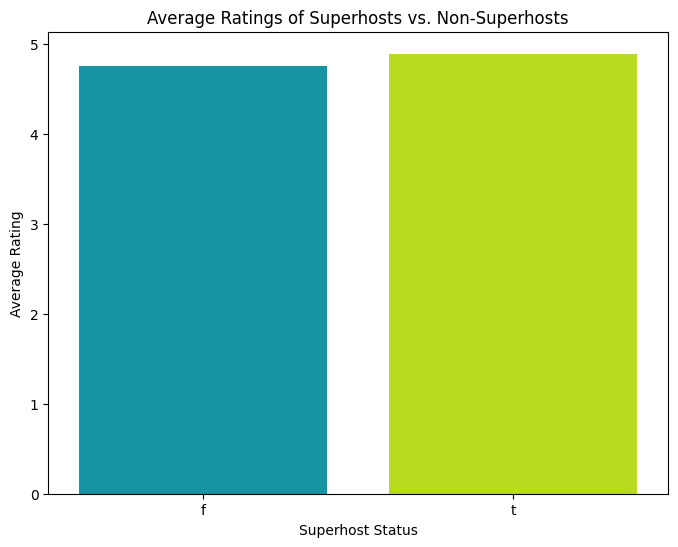

In [34]:
# bar chart to compare avg_rating between superhosts and non-superhosts
# Calculate the mean avg_rating for superhosts and non-superhosts
avg_ratings = capetown_airbnb_df.groupby('host_is_superhost')['avg_rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='host_is_superhost', y='avg_rating', data=avg_ratings, palette='nipy_spectral')

# labels, title
plt.title('Average Ratings of Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

### Boxplot to Compare Ratings Across Property Types

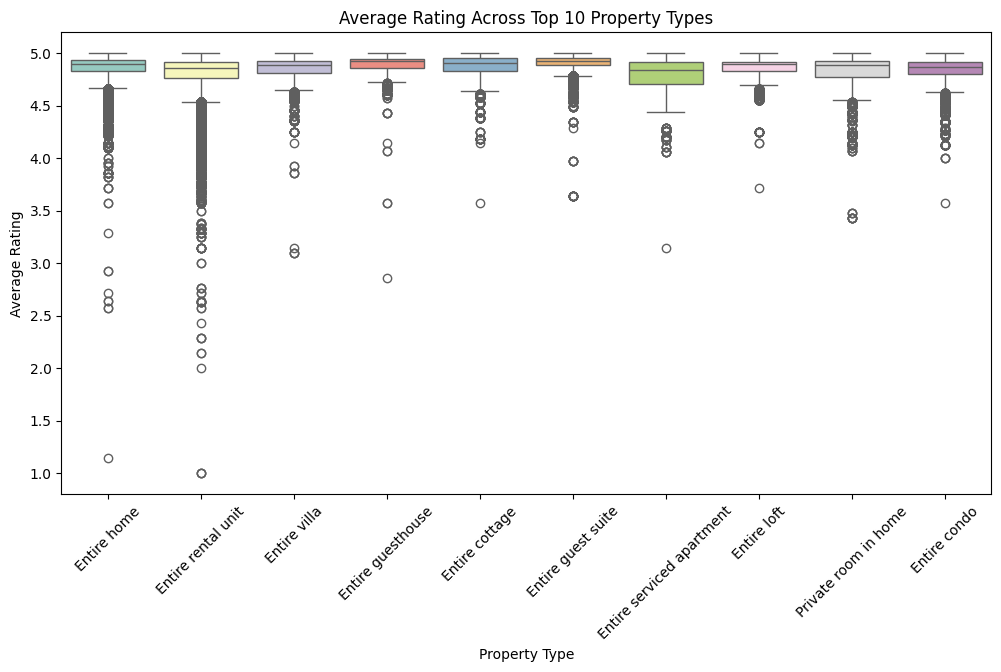

In [35]:
# Count the occurrences of each property type
property_counts = capetown_airbnb_df['property_type'].value_counts()

# Select the top 10 most common property types
top_property_types = property_counts.nlargest(10).index

# Filter the DataFrame for the top property types
filtered_df = capetown_airbnb_df[capetown_airbnb_df['property_type'].isin(top_property_types)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='avg_rating', data=filtered_df, palette='Set3')

# Add labels and title
plt.title('Average Rating Across Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The box plot illustrates the spread and outliers of ratings across various property types:

- Median ratings are generally high across most property types, but there are variations in spread. For example, apartments tend to have a more concentrated distribution, whereas other types like villas show more variation in ratings.

- Outliers exist for most property types, with some listings receiving lower ratings compared to the majority.

- This distribution suggests that while ratings are generally positive, there are differences in guest satisfaction across property types, possibly influenced by amenities, location, or quality of service.

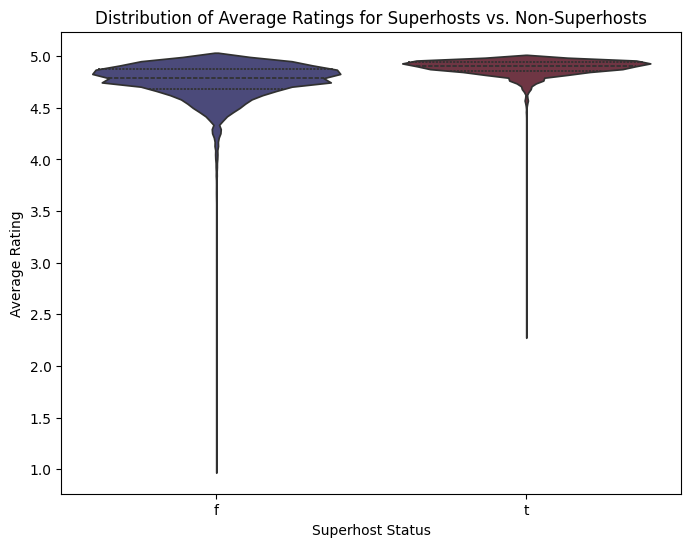

In [36]:
# Violin plot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df, inner='quartile', palette='icefire')

# labels and title
plt.title('Distribution of Average Ratings for Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

The above plot shows that superhosts have ratings that are more concentrated towards the higher end, close to 5.0, indicating consistently high ratings. For Non-superhosts, their ratings are more spread out, with some tailing towards lower ratings, showing a wider variation in guest satisfaction. This suggests that superhosts generally receive higher and more consistent ratings compared to non-superhosts.

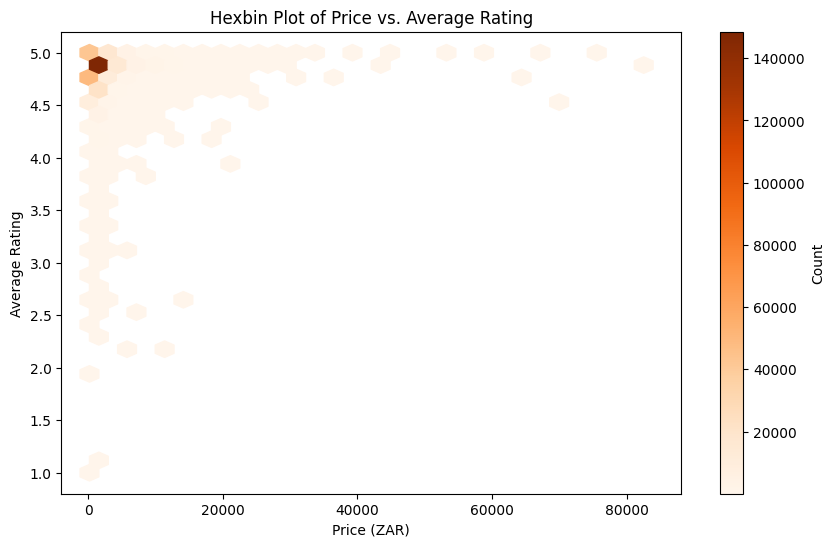

In [37]:
# hexbin plot to visualize the relationship between price and avg_rating
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['price'], filtered_df['avg_rating'], gridsize=30, cmap='Oranges', mincnt=1)

# color bar, labels, title
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Price vs. Average Rating')
plt.xlabel('Price (ZAR)')
plt.ylabel('Average Rating')
plt.show()

Key insights from the hexbin plot above:

- Concentration of High Ratings: There's a high density of properties with prices between 0 and 2,000 ZAR, which have average ratings between 4.5 and 5.0.
- Higher Prices, Fewer Data Points: As the price increases, the density of data points decreases, indicating fewer properties are available at higher price ranges.

In essence, most highly rated properties are clustered in the lower price range.

### Listing Descriptions (Names) v. Price Category - WordCloud

In [38]:
# Define stopwords
stopwords_n = set(["the", "in", "and", "of", "to", "a", "is", "cape town", "with", "cape", "town"])

# Generate word clouds for each price range
# High price listings
high = capetown_airbnb_df[capetown_airbnb_df['price'] >= 10000]
high_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='spring'
).generate(" ".join(word for word in high['name'].str.lower()))

# Low price listings
low = capetown_airbnb_df[capetown_airbnb_df['price'] <= 1000]
low_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='Pastel1'
).generate(" ".join(word for word in low['name'].str.lower()))

# Intermediate price listings
inter = capetown_airbnb_df[(capetown_airbnb_df['price'] > 1000) & (capetown_airbnb_df['price'] < 10000)]
int_wc = WordCloud(
    max_font_size=500, background_color="black", width=1600, height=800,
    collocations=True, stopwords=stopwords_n, max_words=50, colormap='winter'
).generate(" ".join(word for word in inter['name'].str.lower()))

# All price categories
allprices_wc = WordCloud(
    max_font_size=500, background_color="white", collocations=False,
    stopwords=stopwords_n, max_words=75, colormap='icefire_r'
).generate(" ".join(word for word in capetown_airbnb_df['name'].str.lower()))

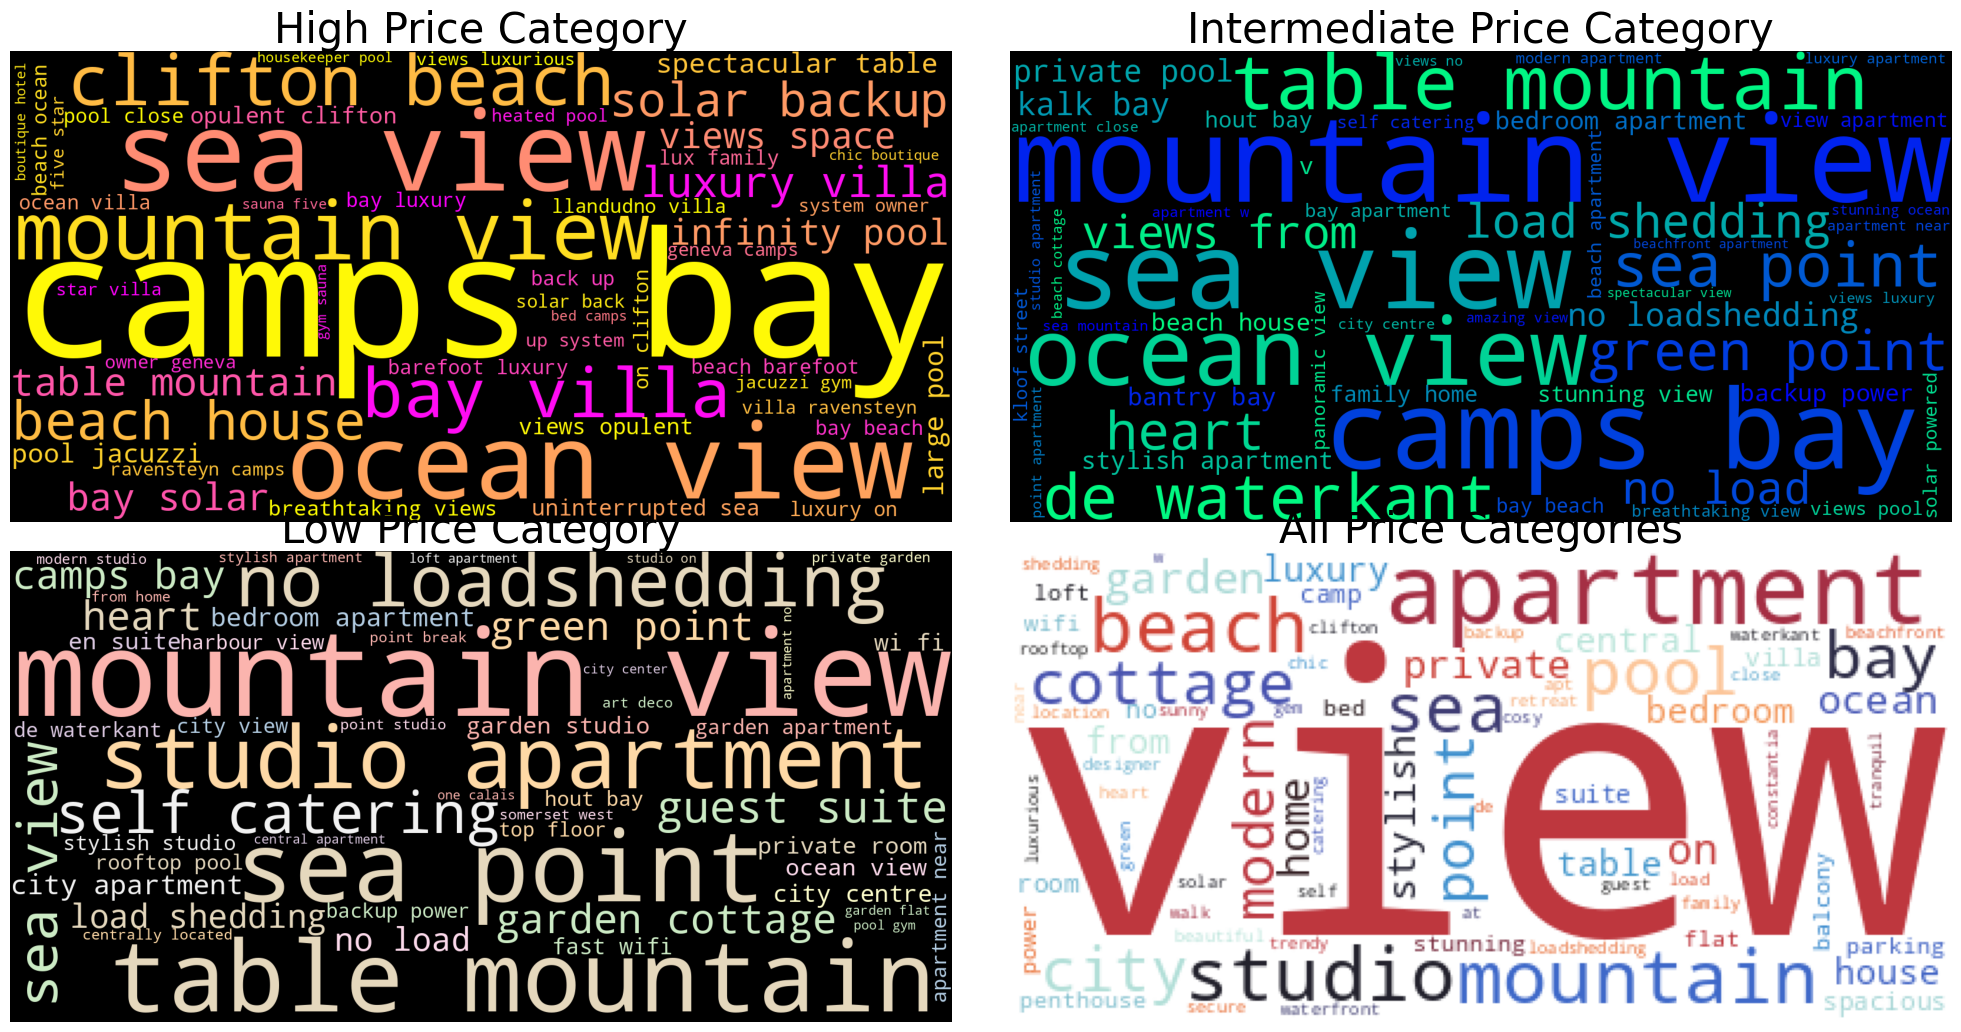

In [39]:
# Plot the word clouds
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.tight_layout(pad=0)

axs[0, 0].imshow(high_wc)
axs[0, 0].set_title('High Price Category', fontsize=30)
axs[0, 0].axis('off')

axs[0, 1].imshow(int_wc)
axs[0, 1].set_title('Intermediate Price Category', fontsize=30)
axs[0, 1].axis('off')

axs[1, 0].imshow(low_wc)
axs[1, 0].set_title('Low Price Category', fontsize=30)
axs[1, 0].axis('off')

axs[1, 1].imshow(allprices_wc)
axs[1, 1].set_title('All Price Categories', fontsize=30)
axs[1, 1].axis('off')

plt.show()

Key Insights:

- High Priced Listings: Villas and houses near the beach (sea, bay, beach, luxury). Camps Bay is also frequently mentioned which is an affluent suburb on the West Coast.

- Intermediate Priced Listings: Villas, family homes, houses, cottages. Camps bay is also mentioned along with proximity to the beach and mountain views. This signals that we are moving further inland to be able to have 'mountain views' as Table mountain is on the coast.

- Low Priced Listings are described as studio apartment, garden cottage, and self catering accomodation. Mountain views and words depicting the tourist attractions are a lot smaller, which is intuitive as the prices are lower.

## Multivariate Analysis

### Correlation Matrix

The heatmap will help us visualize the correlations between numeric variables in the dataset, highlighting how they relate to each other.

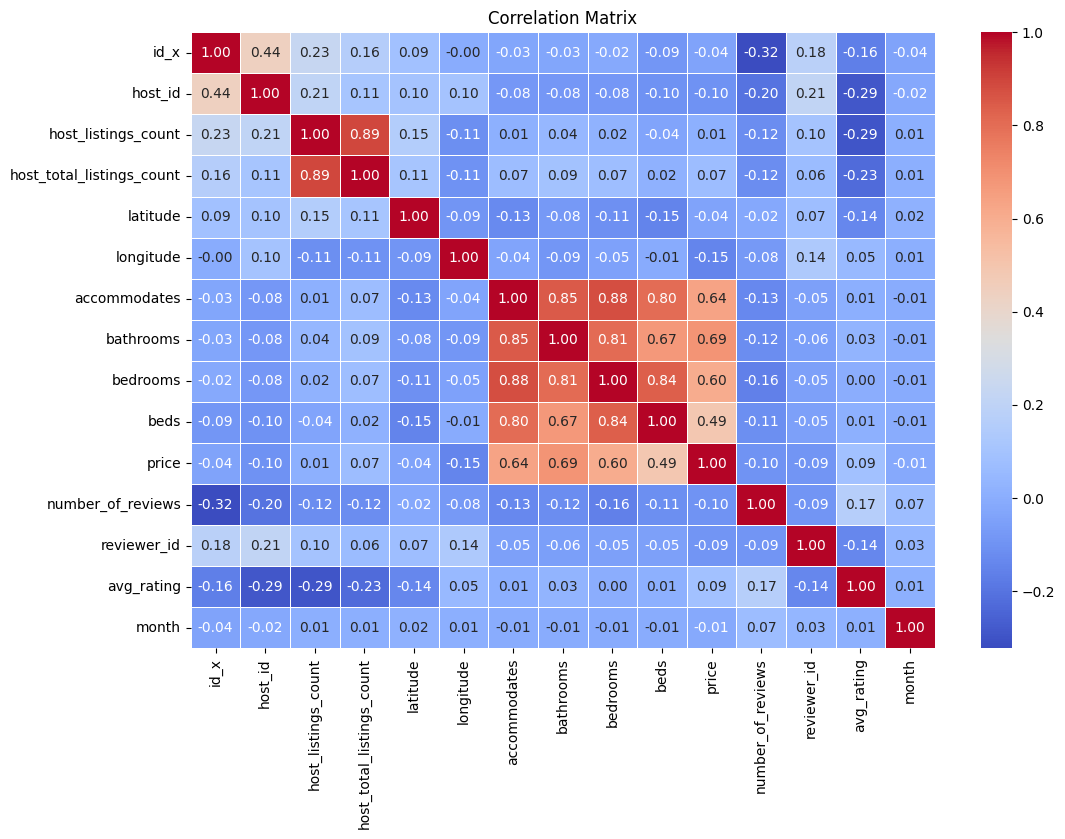

In [40]:
# Filter the dataframe to select only numeric columns
numeric_df = capetown_airbnb_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation between numerical features within the dataset:

- Strong positive correlations are observed among variables related to the number of beds, bedrooms, and accommodates, indicating that larger accommodations have more beds and bedrooms.

- There is a moderate positive correlation between `price` and `accommodates`, suggesting that listings accommodating more people tend to have higher prices.

- Variables such as `host_response_rate` and `host_is_superhost` show minimal correlation with other features, indicating they may be less influential in determining property characteristics or price.

### Pairplot for Selected Features

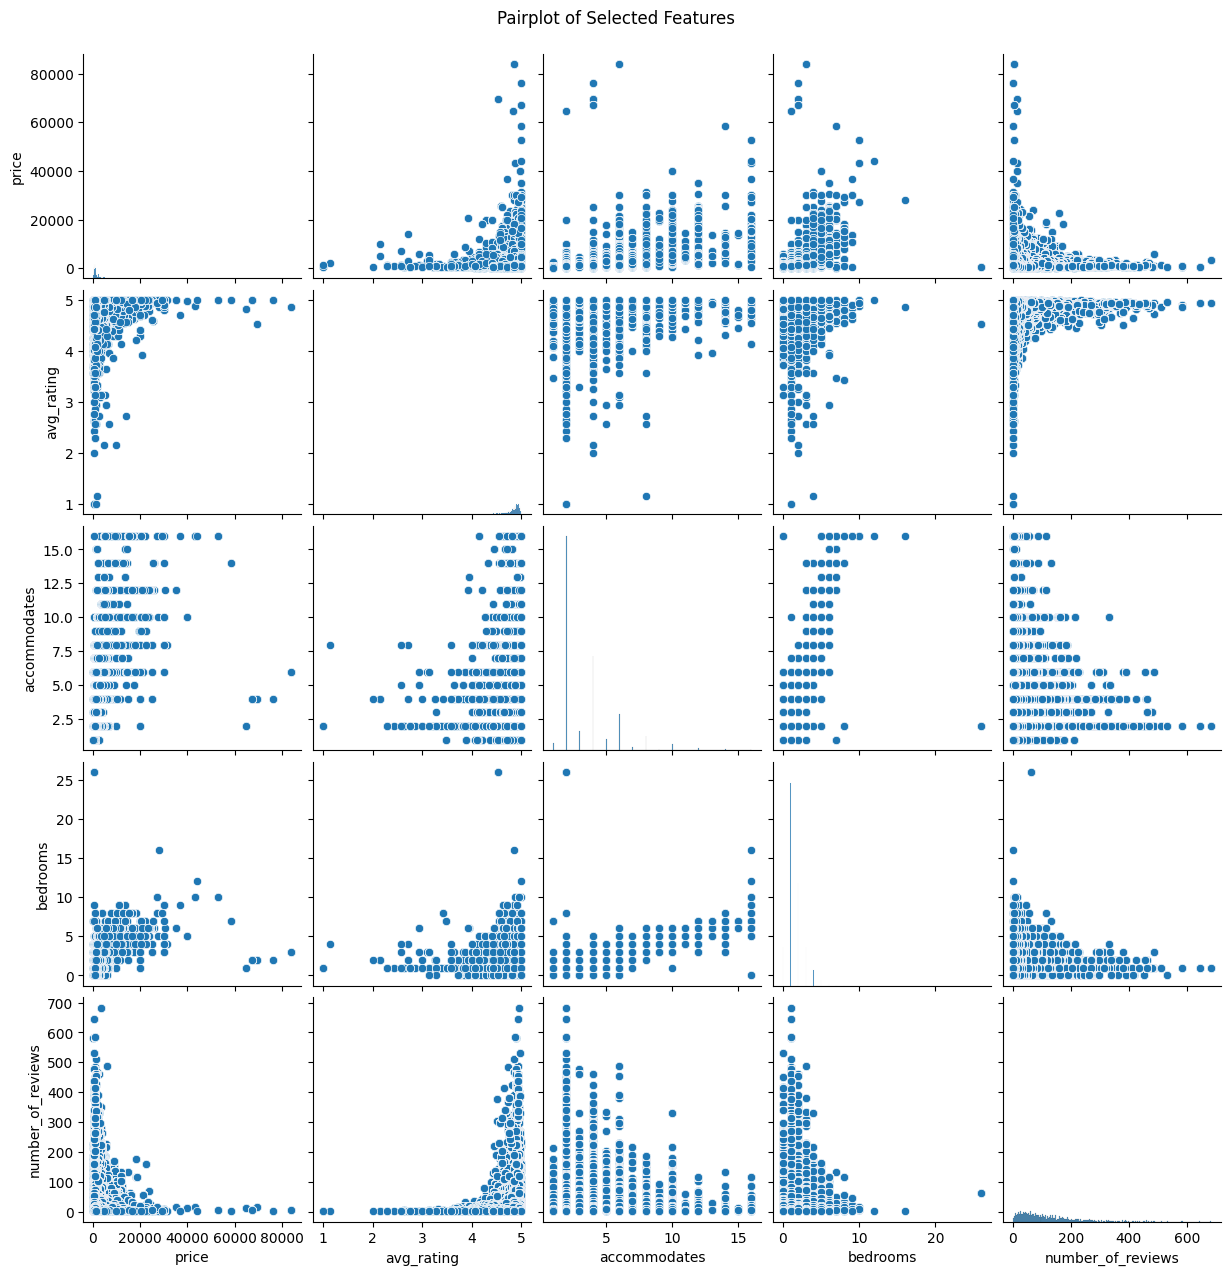

In [41]:
# Selecting a subset of features for pairplot
selected_features = capetown_airbnb_df[['price', 'avg_rating', 'accommodates', 'bedrooms', 'number_of_reviews']]

# Create pairplot
sns.pairplot(selected_features)
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust the title position
plt.show()

The pair plot reveals the scatter and density distributions for multiple features:

- `price` and `accommodates` show a positive trend, where higher accommodation capacity corresponds to higher prices.

- Density distributions reveal right-skewness in variables like `price`, `number_of_reviews`, and `accommodates`, indicating that most properties are in the lower ranges for these features.

- Some features exhibit clustering patterns, such as `beds` and `bedrooms`, where properties with similar accommodation features tend to cluster together.

## **Feature Engineering**

### Anova Test

Now, we will conduct an ANOVA test to analyze how various factors influence the pricing of Airbnb listings, allowing us to identify significant predictors of price.

In [42]:
# ANOVA formula
formula = 'price ~ C(host_response_time) + C(host_is_superhost) + C(neighbourhood_cleansed) + C(property_type) + C(room_type) + accommodates + bathrooms + bedrooms + beds + number_of_reviews + C(instant_bookable) + avg_rating + C(season)'

# Fit the model
model = ols(formula, data=capetown_airbnb_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq        df             F         PR(>F)
C(host_response_time)      5.271567e+09       3.0    807.830474   0.000000e+00
C(host_is_superhost)       2.320312e+07       1.0     10.667142   1.090654e-03
C(neighbourhood_cleansed)  6.089081e+10      63.0    444.337456   0.000000e+00
C(property_type)           5.196230e+10      59.0    404.890952   0.000000e+00
C(room_type)               3.066564e+07       3.0      4.699293   2.775230e-03
C(instant_bookable)        1.759021e+08       1.0     80.867264   2.424958e-19
C(season)                  1.716852e+08       3.0     26.309540   5.231308e-17
accommodates               7.266014e+09       1.0   3340.395846   0.000000e+00
bathrooms                  5.868216e+10       1.0  26977.878931   0.000000e+00
bedrooms                   2.912007e+09       1.0   1338.733344  1.451765e-292
beds                       1.636350e+09       1.0    752.277252  1.882218e-165
number_of_reviews          1.804945e+09       1.0   

Based on the ANOVA results above, the following variables show a statistically significant impact on the Price: `host_response_time`, `neighbourhood_cleansed`, `property_type`, `season`, `accommodates`,
`bathrooms`, `bedrooms`, `beds`, `number_of_reviews` & `avg_rating`

### Data Aggregation

In our merged dataframe, each listing can have multiple reviews, leading to duplicate rows for the same listing. To create our baseline linear regression model, we'll first aggregate the data to ensure each listing appears only once.

In [43]:
# Aggregate data to avoid duplicate rows caused by multiple reviews for the same property
capetown_aggregated_df = (
    capetown_airbnb_df
    .groupby('id_x')
    .agg({
        'host_id': 'first', # Host-related features are constant per listing, so we take the first occurrence
        'host_response_rate': 'first',
        'host_is_superhost': 'first',
        'host_listings_count': 'first',
        'accommodates': 'mean', # we average numerical features across all property info
        'bathrooms': 'mean',
        'bedrooms': 'mean',
        'beds': 'mean',
        'price': 'first', # is taken as the first occurrence since it is consistent across reviews
        'avg_rating': 'mean', # averaged across all reviews
        'number_of_reviews': 'sum',
        'neighbourhood_cleansed': 'first',
        'property_type': 'first'
    })
    .reset_index()
)

In [44]:
# Clean 'host_response_rate' by removing '%' and converting to numeric
capetown_aggregated_df['host_response_rate'] = (
    capetown_aggregated_df['host_response_rate']
    .str.rstrip('%')  # Remove '%' symbol
    .astype(float) / 100  # Convert to float and scale to [0, 1]
)

### Preprocessing

In [45]:
# Frequency Encoding for 'neighbourhood' and 'property_type'
# Each had 190 and 60 unique values respectively, therefore couldn't use one-hot encoding
for col in ['neighbourhood_cleansed', 'property_type']:
    freq_encoding = capetown_aggregated_df[col].value_counts(normalize=True)
    capetown_aggregated_df[f'{col}_freq'] = capetown_aggregated_df[col].map(freq_encoding)

In [46]:
# Encode 'host_is_superhost' as binary (0 and 1)
capetown_aggregated_df['host_is_superhost'] = capetown_aggregated_df['host_is_superhost'].map({'t': 1, 'f': 0})

In [47]:
# Drop original 'neighbourhood' and 'property_type' columns,
# because frequency-encoded columns are now included
capetown_aggregated_df = capetown_aggregated_df.drop(['neighbourhood_cleansed', 'property_type'], axis=1)

In [48]:
capetown_aggregated_df.head(2)

,id_x,host_id,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,avg_rating,number_of_reviews,neighbourhood_cleansed_freq,property_type_freq
0,3191,3754,1.0,0,1,2.0,1.0,1.0,1.0,635.0,4.838571,6241,0.022154,0.174717
1,15007,59072,1.0,1,9,6.0,3.0,3.0,4.0,3102.0,4.901429,2116,0.044307,0.174717


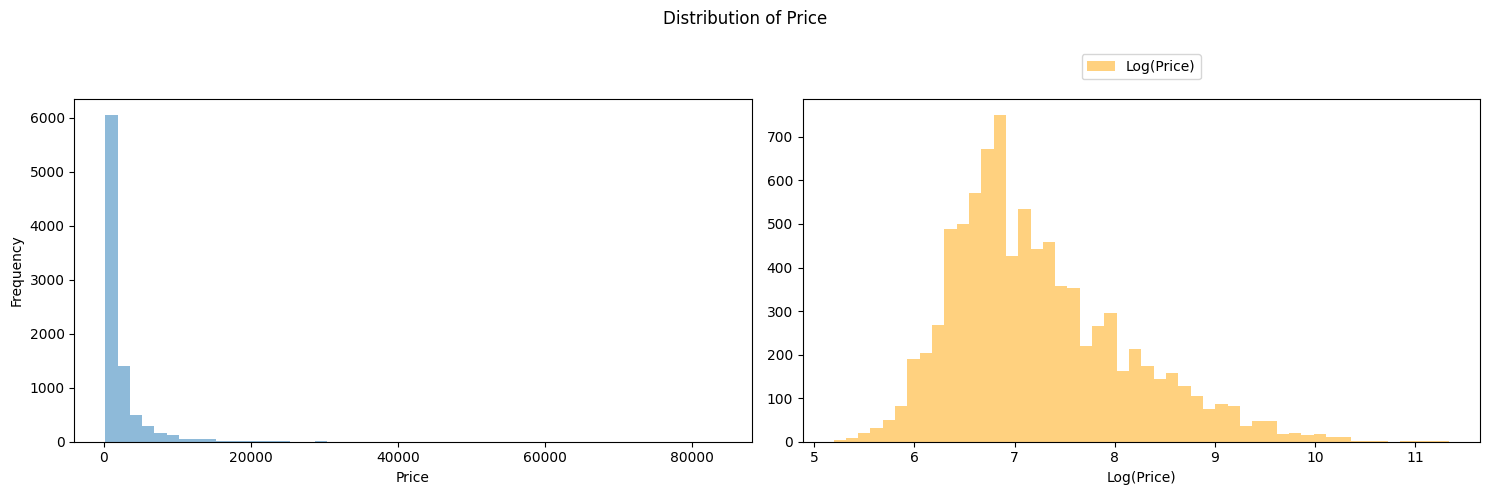

In [49]:
# split data
X = capetown_aggregated_df.drop(['id_x', 'price'], axis=1)
y = capetown_aggregated_df['price']

# log transform y variable(price)
y_log = np.log(y)
y_log.name = "log(price)"

# plot the raw y variable and log transformed y variable
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # figure with 2 subplots

# Plot original price distribution
ax[0].hist(y, bins=50, alpha=0.5, label="Price")
ax[0].set_xlabel("Price")
ax[0].set_ylabel("Frequency")

# Plot log-transformed price distribution
ax[1].hist(y_log, bins=50, color="orange", alpha=0.5, label="Log(Price)")
ax[1].set_xlabel("Log(Price)")

# Add legend
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15))

# main title
plt.suptitle("Distribution of Price")

plt.tight_layout()
plt.show()

The price variable is skewed to the right, but after log transformation, the price variable now has a gaussian distribution.

In [50]:
X_log = capetown_aggregated_df.drop(['id_x', 'price'], axis=1)
y_log = np.log(capetown_aggregated_df['price'])

In [51]:
# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

## Modeling

We'll create various models for this project. We'll use a Linear Regression Model as the baseline. We'll also build a Decision Tree, Random Forest, KNN, XGBoost and LightGBM . `RMSE` will be our evaluation metric.

### Baseline Model: Linear Regression

In [52]:
model_log_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

In [53]:
def fit_log_results(pipe, X_train, X_test, y_train, y_test):
    """
    Function fits pipeline on train data and returns model
    metrics
    """
    # fit pipeline on train data
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # Calculate RMSE for train and test on log scale
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Get MAE for train and test
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # R2 score
    r2 = r2_score(y_test, y_test_pred)

    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"R2 score: {r2:.4f}")
    print("------------------------------------")

In [54]:
# run the function
fit_log_results(model_log_pipeline, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.51, Test RMSE: 0.57
Train MAE: 0.39, Test MAE: 0.42
R2 score: 0.5967
------------------------------------


The Train RMSE of 0.67 and Test RMSE of 0.77 indicate that the model captures general trends but has room for improvement in predictive accuracy. With an R² score of 0.596, the model explains approximately 60% of the variance in the test data, suggesting that additional feature engineering or alternative modeling approaches could potentially enhance performance.

### Linear Regression (with PCA)

Next, we reduce the dimensionality of the data using PCA to retain the most important features, simplifying the model while preserving essential information.

In [55]:
# pipeline including scaling and PCA
baseline_model_pca_log = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=9)),
    ('linreg', LinearRegression())
])

# Fit and evaluate the model
fit_log_results(baseline_model_pca_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.54, Test RMSE: 0.58
Train MAE: 0.40, Test MAE: 0.44
R2 score: 0.5760
------------------------------------


The slightly higher RMSE suggests suggests that the initial dataset likely does not benefit significantly from dimensionality reduction in this case.

### Decision Tree Model

In [56]:
dt_model_log = Pipeline([
    ('dt', DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42))
])

In [57]:
# Fit and evaluate the model
fit_log_results(dt_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.48, Test RMSE: 0.54
Train MAE: 0.36, Test MAE: 0.40
R2 score: 0.6401
------------------------------------


These results indicate that the model is performing relatively well, and generalizes well on unseen data since the training and test RMSE values are closely aligned.

### Random Forest

In [58]:
rf_model_log = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

In [59]:
# Fit and evaluate the model
fit_log_results(rf_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.16, Test RMSE: 0.45
Train MAE: 0.12, Test MAE: 0.33
R2 score: 0.7448
------------------------------------


The Random Forest Model has achieved the lowest errors so far, however, the high test RMSE indicates overfitting.

### Random Forest (with GridSearch)

In [ ]:
# random forest pipeline
rf_model_log = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# parameter grid for grid search
param_grid = {
    'rf__n_estimators': [50, 100, 200],  # number of trees in the forest
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],  # min samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4],  # min samples required to be at a leaf node
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # number of features to consider for best split
}

# cross-validation (10 splits, 3 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# GridSearchCV object
grid_search = GridSearchCV(rf_model_log, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

# fit GridSearchCV object to the training data
grid_search.fit(X_train_log, y_train_log)

# Print best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# random forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

In [ ]:
# Fit and evaluate the best model
fit_log_results(best_rf_model, X_train_log, X_test_log, y_train_log, y_test_log)

The model metrics improved, however, comparing the test and train RMSE the model still seems to overfit.

### KNN Regression Model

In [60]:
# model pipeline
knn_model_log = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsRegressor(n_neighbors=13, metric='euclidean'))
])

In [61]:
# Fit and evaluate the model
fit_log_results(knn_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.44, Test RMSE: 0.52
Train MAE: 0.33, Test MAE: 0.39
R2 score: 0.6616
------------------------------------


The model generalized well on unseen data and hence has a better fit than previous models. However, it explains 66% of the variance, which we aim to improve.

### Tuned KNN Regression Model (with Grid Search)

In [62]:
# parameter grid
param_grid = {
    'knn__n_neighbors': [5, 10, 15, 20],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Corrected 'knn_metric' to 'knn__metric'
}

# GridSearchCV object
grid_search = GridSearchCV(knn_model_log, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_log, y_train_log)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 15}
Best score:  -0.23299941135038044


In [63]:
# Create the final model using the best parameters
knn_model_gs_log = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsRegressor(n_neighbors=grid_search.best_params_['knn__n_neighbors'],
                                 metric=grid_search.best_params_['knn__metric']))  # Uses best parameters
])

In [64]:
# Fit and evaluate the final model
fit_log_results(knn_model_gs_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.45, Test RMSE: 0.52
Train MAE: 0.34, Test MAE: 0.39
R2 score: 0.6624
------------------------------------


Despite grid search, the model doesn't show much of an improvement.

### XGBoost Model

In [65]:
# model pipeline
xgb_model_log = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5))
])

In [66]:
# Fit and evaluate the model
fit_log_results(xgb_model_log, X_train_log, X_test_log, y_train_log, y_test_log)

Train RMSE: 0.35, Test RMSE: 0.44
Train MAE: 0.27, Test MAE: 0.33
R2 score: 0.7593
------------------------------------


With improved RMSE and explained variance(R²) of about 76%, it demonstrates that the model offers a significant improvement in predictive performance and explained variance compared to previous models.

### LightGBM Model

In [67]:
lgb_model_log = Pipeline([
    ('scaler', StandardScaler()),
    ('lgb', lgb.LGBMRegressor(objective='regression', boosting_type='gbdt', n_estimators=500, learning_rate=0.05, max_depth=8,random_state=42, verbose=-1))
])

fit_log_results(lgb_model_log, X_train_log,  X_test_log, y_train_log, y_test_log)

Train RMSE: 0.28, Test RMSE: 0.43
Train MAE: 0.21, Test MAE: 0.32
R2 score: 0.7699
------------------------------------


LightGBM is our best model with the lowest RMSE metrics, and an explained variance of about 77%.

### Neural Network Model

In [68]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

# Define neural network model
def create_nn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', kernel_initializer='glorot_uniform', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_initializer=HeNormal()),
        Dense(1)  # Regression output layer
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
        loss='mse'
    )
    return model

# Initialize and train the model
input_dim = X_train_scaled.shape[1]
nn_model = create_nn_model(input_dim)

# Add EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model with scaled data
history = nn_model.fit(
    X_train_scaled, y_train_log,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

# Predictions using scaled data
y_train_pred = nn_model.predict(X_train_scaled).flatten()
y_test_pred = nn_model.predict(X_test_scaled).flatten()

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train_log, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_log, y_test_pred))
train_mae = mean_absolute_error(y_train_log, y_train_pred)
test_mae = mean_absolute_error(y_test_log, y_test_pred)
train_r2 = r2_score(y_train_log, y_train_pred)
test_r2 = r2_score(y_test_log, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"R²: {test_r2:.2f}")

Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20.9902 - val_loss: 1.0128
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9986 - val_loss: 0.6514
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5905 - val_loss: 1.2164
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0653 - val_loss: 0.4693
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8577 - val_loss: 0.7507
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7143 - val_loss: 0.5027
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6031 - val_loss: 0.5329
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5157 - val_loss: 0.2559
Epoch 9/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4965 - val_loss: 0.4452
Epoch 10/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4049 - val_loss: 0.2924
Epoch 11/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3872 - val_loss: 0.2812
Epoch 12/100
197/197 ━━━━━━━━━━━━━━━━━━━

The neural network achieved a Test RMSE of 0.49, which is higher than the LightGBM's, indicating slightly greater prediction error compared to LightGBM. Overall, while the neural network shows promise, LightGBM remains the better model at this stage.

### Save Best Model

In [69]:
# Fit model
lgb_model_log.fit(X_train_log, y_train_log)

# Save model to a file
joblib.dump(lgb_model_log, 'lgb_model_log.pkl')

print("Model saved as 'lgb_model_log.pkl'")

Model saved as 'lgb_model_log.pkl'


## Guests

To better understand the sentiments provided by the reviews dataset,using vadersentiment analyzer picks up on sentiments in form of compound scores.

In [70]:
# initialize vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [71]:
# feature engineer and introduce a new column sentiment score
capetown_airbnb_df['sentiment_score'] = capetown_airbnb_df['comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

capetown_airbnb_df.head(2)

,id_x,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_response_time,host_response_rate,host_is_superhost,...,price,number_of_reviews,instant_bookable,date,reviewer_id,comments,avg_rating,month,season,sentiment_score
0,3191,https://www.airbnb.com/rooms/3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,within an hour,100%,f,...,635.0,79,t,2013-05-31,5737473,Great home away from home! Bridgette and Marth...,4.838571,5,Fall,0.9357
1,3191,https://www.airbnb.com/rooms/3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,within an hour,100%,f,...,635.0,79,t,2013-12-09,8170322,Das Cottage liegt ruhig und sicher. Wir haben...,4.838571,12,Summer,-0.5994


In [72]:
# Feature engineer the sentiment score to classify positve and negative sentiment
capetown_airbnb_df['sentiment'] = capetown_airbnb_df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

# top 10 listings with positive sentiment
positive_listings = capetown_airbnb_df[capetown_airbnb_df['sentiment'] == 'positive'].sort_values(by='sentiment_score', ascending=False).head(10)

# list the positive listings with their corresponding sentiment score
for index, row in positive_listings.iterrows():
    print(f"Listing ID: {row['id_x']}, Sentiment Score: {row['sentiment_score']}")

Listing ID: 1625734, Sentiment Score: 0.9996
Listing ID: 47780852, Sentiment Score: 0.9994
Listing ID: 691056522149101737, Sentiment Score: 0.9994
Listing ID: 5542396, Sentiment Score: 0.9993
Listing ID: 14270197, Sentiment Score: 0.9992
Listing ID: 16173336, Sentiment Score: 0.9992
Listing ID: 17111549, Sentiment Score: 0.9992
Listing ID: 9919314, Sentiment Score: 0.9992
Listing ID: 12615846, Sentiment Score: 0.9992
Listing ID: 18517007, Sentiment Score: 0.9992


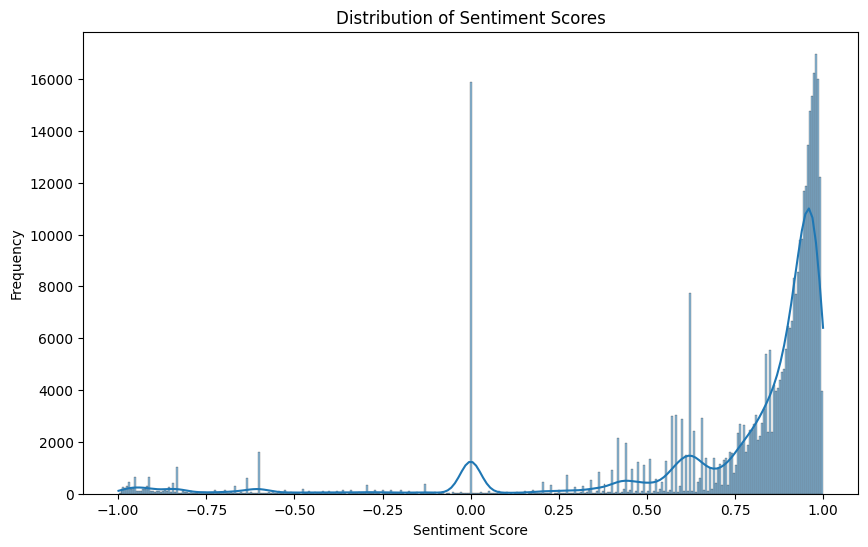

In [74]:
# check the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(capetown_airbnb_df['sentiment_score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

####Understanding Compound Scores

Negative Scores (-1 to 0): Show negative sentiment. Closer to -1 is more negative; closer to 0 is milder. Positive Scores (0 to +1): Show positive sentiment. Closer to +1 is more positive; closer to 0 is milder. Neutral Score (0): A score of 0 is neutral, with no strong emotion.

#### Interpretation

The plot reveals a significant skew toward positive sentiment, with the majority of comments falling between 0.5 and 1. This indicates that most comments express positive sentiments. A noticeable spike around the 0 score suggests that many comments are neutral or lack strong sentiment. Negative sentiment scores appear far less frequent, indicating relatively few strongly negative comments.

#### Insights

The data seems to contain mostly positive or neutral comments, with fewer negative sentiments.

In [75]:
# recommendation df with idx, listing url, description, property_type, price which shall be used by the user
recommendation_df = capetown_airbnb_df[['id_x', 'listing_url', 'description', 'property_type', 'price']]

In [76]:
# create a sentiment dataframe with id, reviewer_id comments and sentiment_score
sentiment_df = capetown_airbnb_df[['id_x', 'reviewer_id', 'sentiment_score']]

In [80]:
# split data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(capetown_airbnb_df[['id_x', 'reviewer_id', 'sentiment_score']], reader)

In [81]:
# train test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [82]:
print("Type trainset :", type(trainset), "\n")
print("Type testset :", type(testset))

Type trainset : <class 'surprise.trainset.Trainset'> 

Type testset : <class 'list'>


In [83]:
# number of users and items
n_users = trainset.n_users
n_items = trainset.n_items

print("Number of users in the trainset :", n_users)
print("Number of items in the trainset :", n_items)

Number of users in the trainset : 8653
Number of items in the trainset : 233549


In [84]:
# handle the sparsity between the users and the items
sparsity = 1 - (len(capetown_airbnb_df) / (n_users * n_items))
print("Sparsity of the dataset :", sparsity)

Sparsity of the dataset : 0.9998170022801485


In [85]:
# Build the SVD model
svd = SVD(random_state=42)

# Train the model on the training set
svd.fit(trainset)

# Test the model on the test set
predictions = svd.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.4521
MAE:  0.2421


The low values for both RMSE (0.4520) and MAE (0.2419)indicate that the SVD model is performing well, with small errors on average and a relatively low likelihood of large, unexpected deviations in predictions.

In [86]:
knn_baseline = KNNBaseline(sim_options={'name': 'pearson', 'user_based': True})
knn_baseline.fit(trainset)

# Test the model on the test set
predictions = knn_baseline.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4521
MAE:  0.2420


In [99]:
# Define parameter grid
param_grid = {
    'n_factors': [20, 50, 100, 150, 200],
    'n_epochs': [10, 20, 30],
    'lr_all': [0.001, 0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1, 0.15, 0.2]
}

# Number of random combinations to try
n_iter = 10
best_rmse = float('inf')
best_params = None

# Try random combinations
for i in range(n_iter):
    # Randomly select parameters
    current_params = {
        'n_factors': random.choice(param_grid['n_factors']),
        'n_epochs': random.choice(param_grid['n_epochs']),
        'lr_all': random.choice(param_grid['lr_all']),
        'reg_all': random.choice(param_grid['reg_all'])
    }

    # Create and train model with current parameters
    algo = SVD(**current_params)

    # Perform cross-validation
    results = cross_validate(algo, data, measures=['RMSE'],
                           cv=5, n_jobs=-1, verbose=True)

    # Get average RMSE
    mean_rmse = np.mean(results['test_rmse'])

    print(f"\nIteration {i+1}/{n_iter}")
    print(f"Parameters: {current_params}")
    print(f"Mean RMSE: {mean_rmse}")

    # Update best parameters if current result is better
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_params = current_params
        print("New best model found!")

print("\nSearch completed!")
print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")

# Train final model with best parameters
best_model = SVD(**best_params)
best_model.fit(data.build_full_trainset())

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4532  0.4492  0.4542  0.4568  0.4524  0.4532  0.0025  
Fit time          18.18   17.12   17.33   16.15   10.51   15.86   2.75    
Test time         0.82    0.96    1.42    1.91    0.87    1.20    0.42    

Iteration 1/10
Parameters: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.02}
Mean RMSE: 0.45316691417327926
New best model found!
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4488  0.4536  0.4578  0.4496  0.4555  0.4530  0.0034  
Fit time          13.61   13.46   12.42   12.36   6.48    11.67   2.64    
Test time         0.79    1.19    0.78    0.95    0.82    0.91    0.15    

Iteration 2/10
Parameters: {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.15}
Mean RMSE: 0.4530340351319393
New best model found!
Evalu